In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as pl

pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     #'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 1.4,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [17]:
target_time = np.arange(0.1, 2797, 0.1)

In [18]:
def prepare_data(path):
    data = np.loadtxt(path)
    return interp1d(data[:,0], data[:,1])(target_time)

In [19]:
ccm = prepare_data('ccm/lev4/Psi4_truncated.dat')
ccm_low = prepare_data('ccm/lev3/Psi4_truncated.dat')
ref_high = prepare_data('ref/high/Psi4_truncated.dat')
ref_med = prepare_data('ref/med/Psi4_truncated.dat')
cce = prepare_data('cce/Psi4_truncated.dat')

# Comparisons

Text(0.5, 0, '$u/M$')

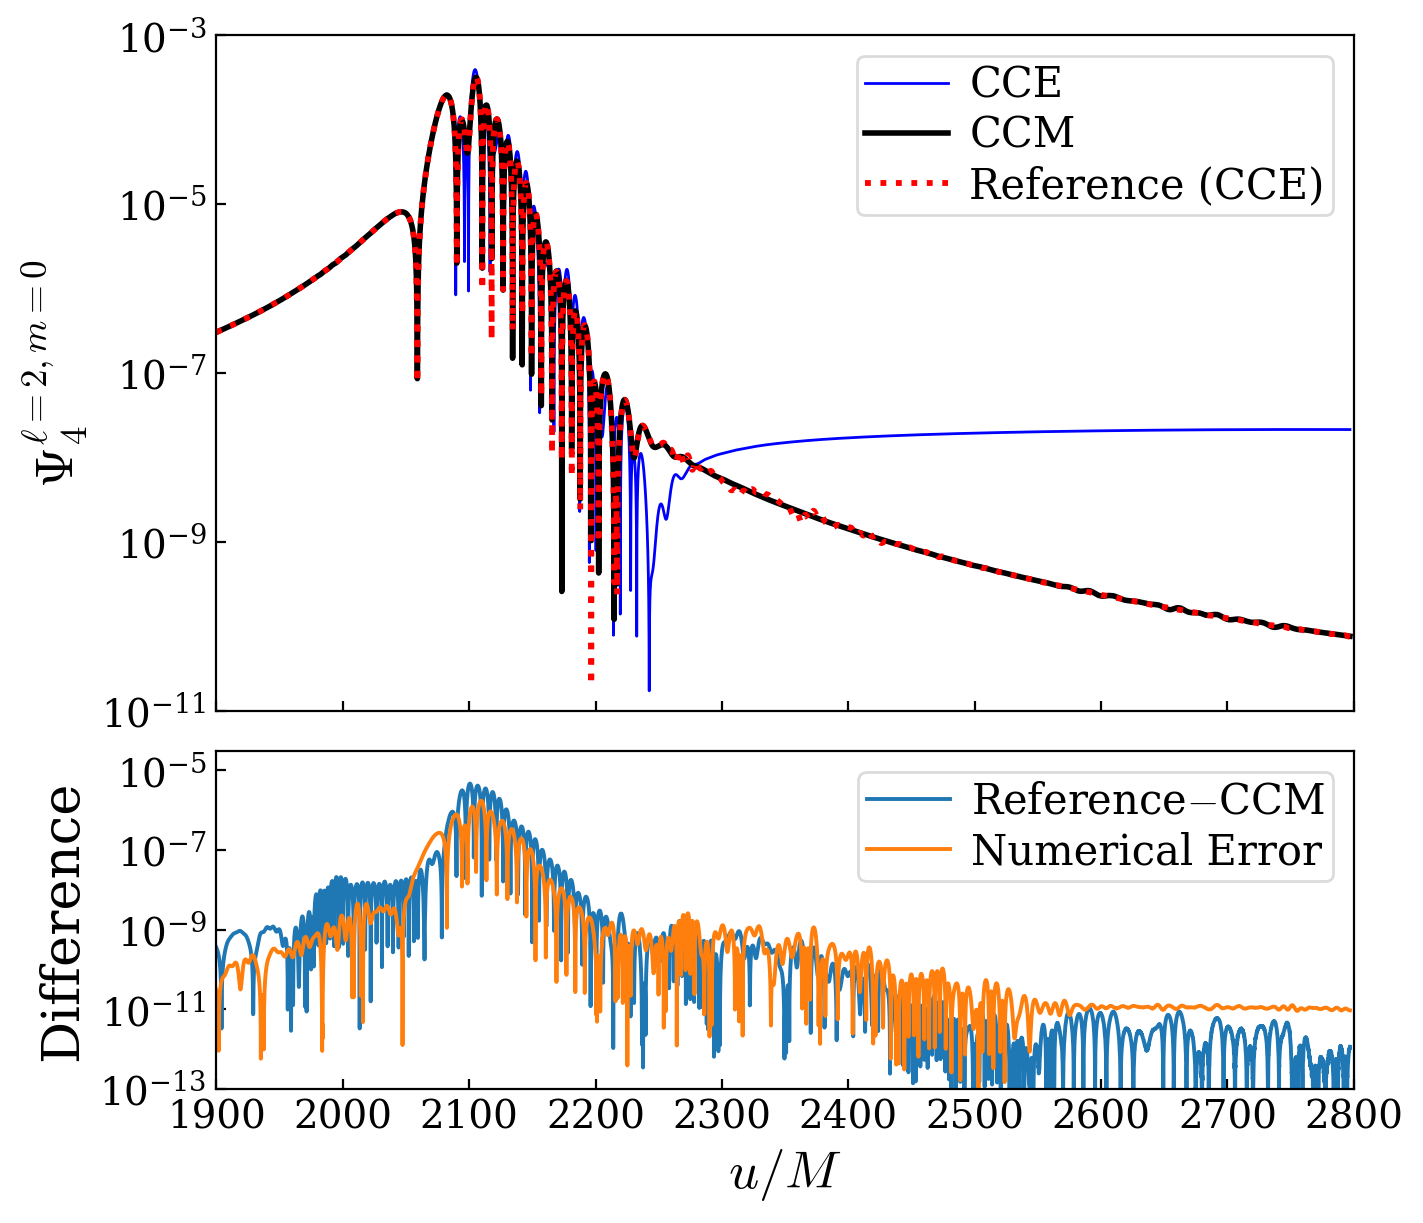

In [20]:
fig,ax=pl.subplots(2,1,figsize=(7,6),sharex=True, constrained_layout=True ,gridspec_kw={'height_ratios': [2,1]})

ax[0].semilogy(target_time, abs(cce), color='b', lw=1, label='CCE')
ax[0].semilogy(target_time, abs(ccm), color='k', lw=2, label='CCM')
ax[0].semilogy(target_time, abs(ref_high), color='r', lw=2.1, label='Reference (CCE)', linestyle=':')
ax[0].set_ylim(1e-11, 1e-3)
ax[0].legend(fontsize=15)
ax[0].set_ylabel(r'$\Psi_4^{\ell=2,m=0}$', fontsize=19)


ax[1].semilogy(target_time, abs(ref_high-ccm), label='Reference$-$CCM')
ax[1].semilogy(target_time, abs(ref_high-ref_med), label='Numerical Error')
ax[1].set_ylim(1e-13, 3e-5)
ax[1].set_xlim(1900, 2800)
ax[1].set_ylabel('Difference', fontsize=19)
ax[1].legend(fontsize=15)
pl.xlabel('$u/M$', fontsize=19)
